In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

N = 25

df = df.with_columns([
    pl.col('taker_buy_quote_volume').rolling_sum(N).over('symbol').alias('taker_buy_quote_volume_sum'),
    pl.col('taker_sell_quote_volume').rolling_sum(N).over('symbol').alias('taker_sell_quote_volume_sum'),
])

df = df.with_columns([
    (pl.col('taker_buy_quote_volume_sum') - pl.col('taker_sell_quote_volume_sum')).alias('net_taker_quote_volume'),
    (pl.col('taker_buy_quote_volume_sum') + pl.col('taker_sell_quote_volume_sum')).alias('total_taker_quote_volume')
])

# 按日期和因子值排序并进行排名
df = df.with_columns([
    pl.col("net_taker_quote_volume").rank("dense").over("open_time").alias("net_taker_rank"),
    pl.col("total_taker_quote_volume").rank("dense").over("open_time").alias("total_taker_rank")
])

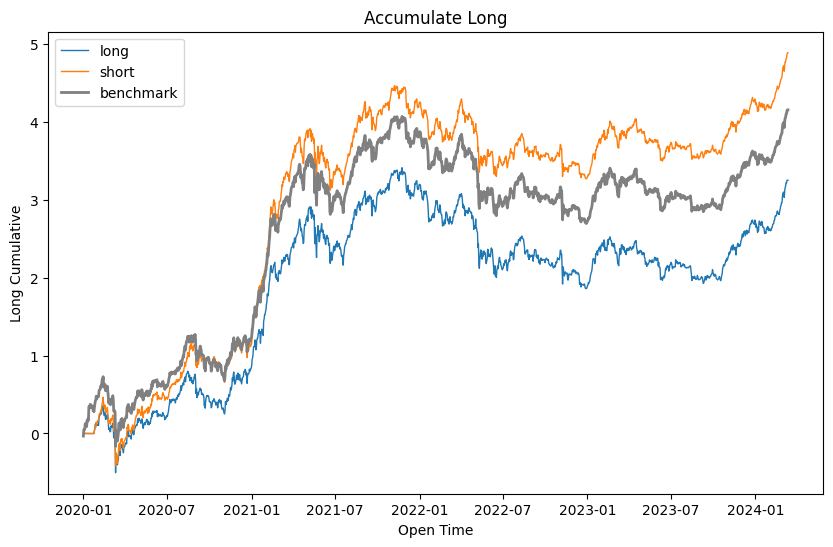

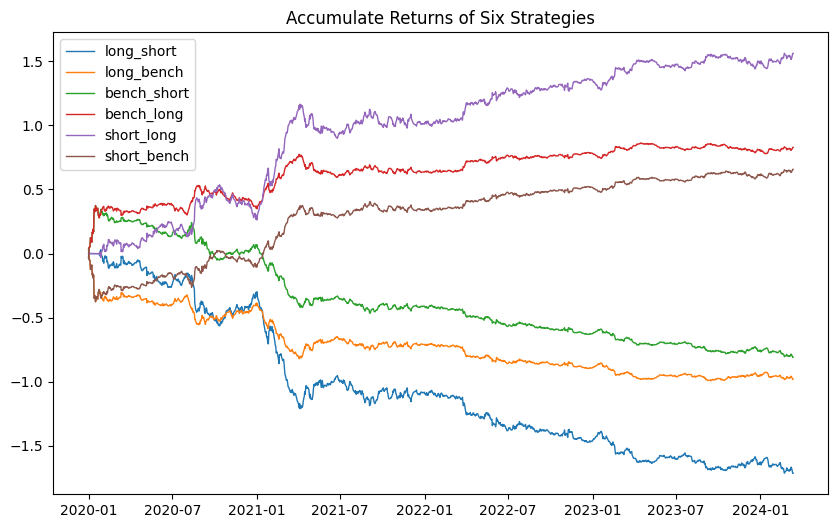

long: 
ann_return = 18.575  sharpe = 4.1008  maxdd = 0.6345  calmar_ratio = 29.2764  

short: 
ann_return = 27.935  sharpe = 6.1612  maxdd = 0.603  calmar_ratio = 46.3259  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = -9.798  sharpe = -7.681  maxdd = 1.6941  calmar_ratio = -5.7834  

long_bench: 
ann_return = -5.6078  sharpe = -6.2812  maxdd = 0.9922  calmar_ratio = -5.6519  

bench_long: 
ann_return = 4.7318  sharpe = 5.3  maxdd = 0.119  calmar_ratio = 39.7533  

short_long: 
ann_return = 8.922  sharpe = 6.9943  maxdd = 0.1788  calmar_ratio = 49.9074  

short_bench: 
ann_return = 3.7521  sharpe = 4.064  maxdd = 0.3965  calmar_ratio = 9.4622  

bench_short: 
ann_return = -4.6281  sharpe = -5.0129  maxdd = 0.8617  calmar_ratio = -5.3709  



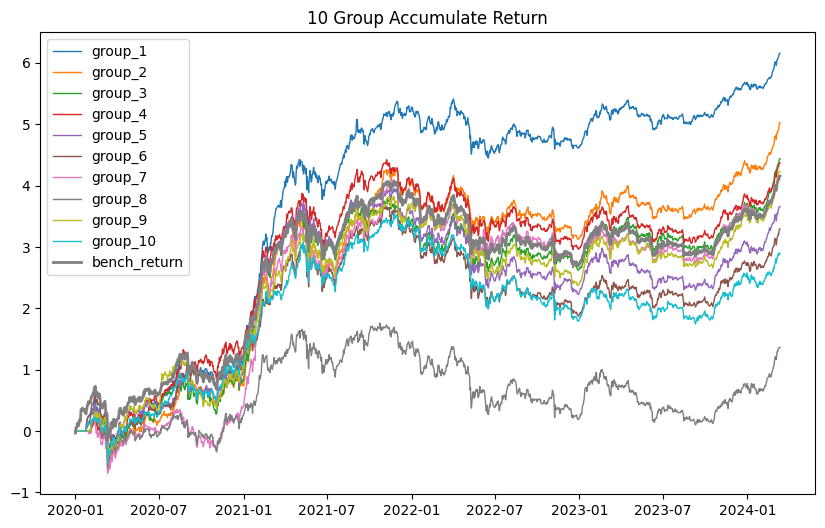

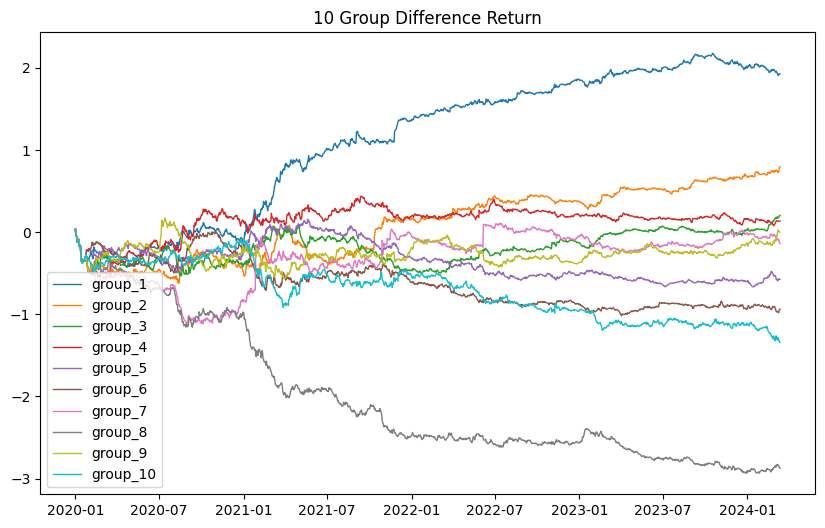

group_1: 
ann_return = 35.1833  sharpe = 7.8157  maxdd = 0.6515  calmar_ratio = 54.0011  

group_2: 
ann_return = 28.7248  sharpe = 5.9671  maxdd = 0.7204  calmar_ratio = 39.8757  

group_3: 
ann_return = 25.3445  sharpe = 5.3832  maxdd = 0.5625  calmar_ratio = 45.0539  

group_4: 
ann_return = 24.9486  sharpe = 5.2297  maxdd = 0.733  calmar_ratio = 34.0347  

group_5: 
ann_return = 20.8991  sharpe = 4.4285  maxdd = 0.569  calmar_ratio = 36.7312  

group_6: 
ann_return = 18.82  sharpe = 3.9232  maxdd = 0.6304  calmar_ratio = 29.8519  

group_7: 
ann_return = 23.4089  sharpe = 4.5503  maxdd = 0.7409  calmar_ratio = 31.5966  

group_8: 
ann_return = 7.7636  sharpe = 1.6715  maxdd = 0.7075  calmar_ratio = 10.974  

group_9: 
ann_return = 24.1803  sharpe = 5.0242  maxdd = 0.5747  calmar_ratio = 42.0727  

group_10: 
ann_return = 16.5147  sharpe = 3.6909  maxdd = 0.606  calmar_ratio = 27.254  

-----------------------------------------
group_difference_1: 
ann_return = 11.0005  sharpe = 6.7

In [2]:
factors = df.select(['open_time', 'symbol', 'total_taker_quote_volume'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()